In [12]:
import sys
sys.path.append('../')
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout
from smodels.theory.element import Element
from smodels.theory.tree import Tree
from collections import OrderedDict

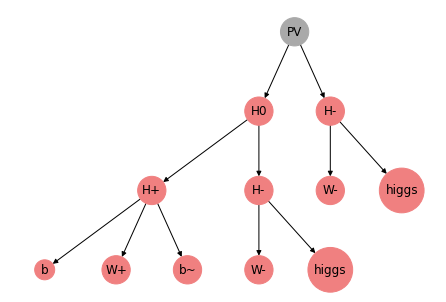

In [13]:
stringEl = "(PV > H0(1),H-(2)), (H0(1) > H+(3),H-(4)), (H+(3) > b,W+,b~), (H-(4) > W-,higgs), (H-(2) > W-,higgs)"
tree = Tree(stringEl)
tree.setCanonName()
tree.draw()
# tree.draw(labelAttr='canonName')

In [14]:
treeDict = OrderedDict()
sortedNodes = []
for mom, daughters in nx.bfs_successors(tree, tree.getTreeRoot()):    
    sortedDaughters = sorted(daughters, key=lambda d: (d.canonName, d.particle))
    if not mom in sortedNodes:
        sortedNodes.append(mom)
    sortedNodes += sortedDaughters
    treeDict[mom] = sortedDaughters

sortedTreeDict = OrderedDict()
for mom in sortedNodes:
    if mom in treeDict:
        sortedTreeDict[mom] = treeDict[mom]
    

In [15]:
t = nx.to_networkx_graph(sortedTreeDict, create_using=tree)

In [16]:
tree.__dict__

{'canonName': 111010011101001101010000,
 'graph_attr_dict_factory': dict,
 'node_dict_factory': dict,
 'node_attr_dict_factory': dict,
 'adjlist_outer_dict_factory': dict,
 'adjlist_inner_dict_factory': dict,
 'edge_attr_dict_factory': dict,
 'graph': {},
 '_node': {PV: {},
  H-: {},
  H0: {},
  H-: {},
  H+: {},
  W-: {},
  higgs: {},
  W-: {},
  higgs: {},
  W+: {},
  b: {},
  b~: {}},
 '_adj': {PV: {H-: {}, H0: {}},
  H-: {W-: {}, higgs: {}},
  H0: {H-: {}, H+: {}},
  H-: {W-: {}, higgs: {}},
  H+: {W+: {}, b: {}, b~: {}},
  W-: {},
  higgs: {},
  W-: {},
  higgs: {},
  W+: {},
  b: {},
  b~: {}},
 '_pred': {PV: {},
  H-: {PV: {}},
  H0: {PV: {}},
  H-: {H0: {}},
  H+: {H0: {}},
  W-: {H-: {}},
  higgs: {H-: {}},
  W-: {H-: {}},
  higgs: {H-: {}},
  W+: {H+: {}},
  b: {H+: {}},
  b~: {H+: {}}},
 '_succ': {PV: {H-: {}, H0: {}},
  H-: {W-: {}, higgs: {}},
  H0: {H-: {}, H+: {}},
  H-: {W-: {}, higgs: {}},
  H+: {W+: {}, b: {}, b~: {}},
  W-: {},
  higgs: {},
  W-: {},
  higgs: {},
  W